In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [20]:
data = pd.read_csv('salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Applied Scientist,20000,USD,20000,NG,100,US,L
1,2023,SE,FT,Machine Learning Engineer,210000,USD,210000,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
3,2023,MI,FT,Data Quality Analyst,95000,USD,95000,US,0,US,M
4,2023,MI,FT,Data Quality Analyst,70000,USD,70000,US,0,US,M


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671 entries, 0 to 4670
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4671 non-null   int64 
 1   experience_level    4671 non-null   object
 2   employment_type     4671 non-null   object
 3   job_title           4671 non-null   object
 4   salary              4671 non-null   int64 
 5   salary_currency     4671 non-null   object
 6   salary_in_usd       4671 non-null   int64 
 7   employee_residence  4671 non-null   object
 8   remote_ratio        4671 non-null   int64 
 9   company_location    4671 non-null   object
 10  company_size        4671 non-null   object
dtypes: int64(4), object(7)
memory usage: 401.5+ KB


`work_year`: The year the salary was paid.

`experience_level`: The experience level in the job during the year with the following possible values:
- **EN**: Entry-level / Junior
- **MI**: Mid-level / Intermediate
- **SE**: Senior-level / Expert
- **EX**: Executive-level / Director

`employment_type`: The type of employement for the role:
- **PT**: Part-time
- **FT**: Full-time
- **CT**: Contract
- **FL**: Freelance

`job_title`: The role worked in during the year.

`salary`: The total gross salary amount paid.

`salary_currency`: The currency of the salary paid as an ISO 4217 currency code.

`salary_in_usd`: The salary in USD (FX rate divided by avg. USD rate of respective year via data from BIS).

`employee_residence`:Employee's primary country of residence in during the work year as an ISO 3166 country code.

`remote_ratio`: The overall amount of work done remotely, possible values are as follows:
- **0**: No remote work (less than 20%)
- **50**: Partially remote/hybird
- **100**: Fully remote (more than 80%)

`company_location`: The country of the employer's main office or contracting branch as an ISO 3166 country code.

`company_size`: The average number of people that worked for the company during the year:
- **S**: less than 50 employees (small)
- **M**: 50 to 250 employees (medium)
- **L**: more than 250 employees (large)

In [22]:
data.iloc[0]

work_year                          2023
experience_level                     MI
employment_type                      FT
job_title             Applied Scientist
salary                            20000
salary_currency                     USD
salary_in_usd                     20000
employee_residence                   NG
remote_ratio                        100
company_location                     US
company_size                          L
Name: 0, dtype: object

#### Explore salary

Mean salary by work year, experience level and employment type

In [23]:
# mean salary by work year, experience level and employment type
sal1 = data.groupby(['work_year', 'experience_level', 'employment_type']).aggregate({'salary_in_usd': ['mean', 'count']}).reset_index()
sal1

work_year experience_level employment_type  salary_in_usd      
                                                        mean count
0       2020               EN              CT  100000.000000     1
1       2020               EN              FT   75757.800000    15
2       2020               EN              PT   18817.500000     2
3       2020               EX              FT  139944.333333     3
4       2020               MI              CT   60000.000000     1
5       2020               MI              FT   92933.300000    30
6       2020               SE              FL   60000.000000     1
7       2020               SE              FT  141784.058824    17
8       2021               EN              FT   65264.068182    44
9       2021               EN              PT   23841.000000     2
10      2021               EX              CT  416000.000000     1
11      2021               EX              FT  160586.666667     9
12      2021               MI              CT  270000.000000     1
13      2021               MI              FL   32777.500000     2
14      2021               MI              FT   86486.634146    82
15      2021               MI              PT   62870.500000     2
16      2021               SE              CT  105000.000000     1
17      2021               SE              FL   60000.000000     1
18      2021               SE              FT  126378.208333    72
19      2022               EN              CT   30469.000000     1
20      2022               EN              FL   75000.000000     2
21      2022               EN              FT   81651.095238   105
22      2022               EN              PT   78988.000000     5
23      2022               EX              FT  188260.292683    41
24      2022               MI              CT   60000.000000     1
25      2022               MI              FL   65261.500000     2
26      2022               MI              FT  103473.866477   352
27      2022               MI              PT   52533.000000     1
28      2022               SE              CT   90000.000000     1
29      2022               SE              FT  148111.116300  1135
30      2023               EN              CT   83200.000000     1
31      2023               EN              FT   97700.381944   144
32      2023               EN              PT   18009.000000     1
33      2023               EX              FT  202128.204082    98
34      2023               MI              CT   85125.000000     4
35      2023               MI              FL   36000.000000     1
36      2023               MI              FT  119664.812632   475
37      2023               SE              CT  324006.000000     1
38      2023               SE              FL   50000.000000     2
39      2023               SE              FT  162504.937345  2011

In [24]:
sal1[sal1['experience_level'] == 'MI'].groupby(['experience_level','employment_type']).count()

/var/folders/j8/w8st8sjd70d2mm8_p1kfj_qw0000gn/T/ipykernel_21760/3371867349.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sal1[sal1['experience_level'] == 'MI'].groupby(['experience_level','employment_type']).count()


work_year salary_in_usd      
                                                    mean count
experience_level employment_type                              
MI               CT                      4             4     4
                 FL                      3             3     3
                 FT                      4             4     4
                 PT                      2             2     2

Proportion of Remote Jobs by Work Year

In [25]:
# Proportion of Remote Jobs by Work Year
remote1 = (data.groupby('work_year')['remote_ratio']
           .value_counts(normalize=True).to_frame()
           .sort_values(['work_year', 'remote_ratio'])
           .reset_index())
remote1

,work_year,remote_ratio,proportion
0,2020,0,0.228571
1,2020,50,0.271429
2,2020,100,0.500000
3,2021,0,0.133641
4,2021,50,0.331797
5,2021,100,0.534562
6,2022,0,0.430741
7,2022,50,0.036452
8,2022,100,0.532807
9,2023,0,0.632944


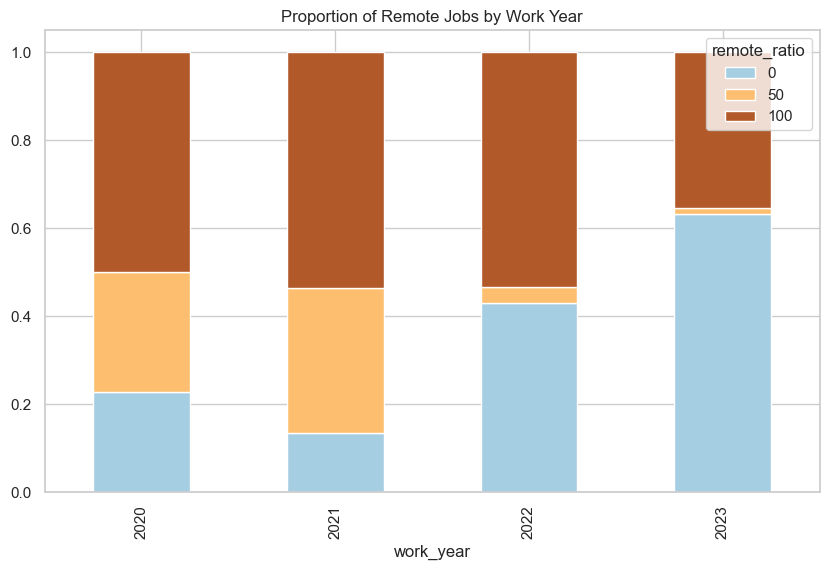

In [26]:
sns.set(style="whitegrid")
# sns.barplot(x='work_year', y='proportion', hue='remote_ratio', data=remote1, palette="Paired")
pd.crosstab(index=data['work_year'],
            columns=data['remote_ratio'],
            normalize="index").plot(kind='bar', 
            stacked=True, 
            colormap='Paired',
            figsize=(10, 6))
plt.title('Proportion of Remote Jobs by Work Year')
plt.show()

In [27]:
data['employment_type'].value_counts().to_frame()

,count
employment_type,
FT,4633
CT,14
PT,13
FL,11


In [28]:
data['experience_level'].value_counts().to_frame()

,count
experience_level,
SE,3242
MI,954
EN,323
EX,152


In [29]:
data.groupby(['employment_type', 'experience_level']).count()['job_title'].to_frame()

job_title
employment_type experience_level           
CT              EN                        3
                EX                        1
                MI                        7
                SE                        3
FL              EN                        2
                MI                        5
                SE                        4
FT              EN                      308
                EX                      151
                MI                      939
                SE                     3235
PT              EN                       10
                MI                        3

In [30]:
country_code = pd.read_csv('country_code.csv')
country_code.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [31]:
country_code.iloc[0]

Name    Afghanistan
Code             AF
Name: 0, dtype: object

In [32]:
(data[data['work_year']==2023]
 .groupby('company_location')[['salary_in_usd']]
 .mean())

,salary_in_usd
company_location,
AM,50000.000000
AR,65000.000000
AU,164583.333333
BA,120000.000000
BR,19738.000000
CA,155860.169811
CF,48997.000000
CH,122240.000000
CO,64833.333333


In [33]:
country_code[country_code.Name == 'Russian Federation']

,Name,Code
182,Russian Federation,RU


In [34]:
data[data['company_location'] == 'RU']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
711,2023,SE,FT,Product Data Analyst,57000,USD,57000,GE,100,RU,L
1937,2022,EX,FT,Data Science Manager,106000,USD,106000,UZ,0,RU,L
4449,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
4450,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L


In [35]:
data['company_location'].unique()

array(['US', 'GB', 'PL', 'AU', 'FR', 'NO', 'ES', 'CA', 'GH', 'IN', 'AR',
       'SA', 'DE', 'CO', 'NG', 'JP', 'RU', 'ZA', 'IT', 'HK', 'NL', 'CH',
       'CF', 'FI', 'UA', 'IE', 'IL', 'SG', 'SE', 'SI', 'MX', 'PT', 'TH',
       'HR', 'BR', 'EE', 'AM', 'BA', 'KE', 'LV', 'RO', 'PK', 'LT', 'IR',
       'BS', 'HU', 'AT', 'PR', 'AS', 'GR', 'DK', 'PH', 'BE', 'ID', 'TR',
       'EG', 'AE', 'MY', 'HN', 'CZ', 'DZ', 'IQ', 'CN', 'NZ', 'CL', 'MD',
       'LU', 'MT'], dtype=object)

In [36]:
# data['job_title'].value_counts().to_frame()
data[data['job_title'].str.contains('Ana')]['job_title'].unique()


array(['Data Quality Analyst', 'Data Analyst', 'Business Data Analyst',
       'BI Analyst', 'Analytics Engineer',
       'Analytics Engineering Manager',
       'Business Intelligence Data Analyst', 'Insight Analyst',
       'Staff Data Analyst', 'Product Data Analyst', 'BI Data Analyst',
       'Data Visualization Analyst', 'Sales Data Analyst',
       'Finance Data Analyst', 'Data Analytics Manager',
       'Data Operations Analyst', 'Compliance Data Analyst',
       'Lead Data Analyst', 'Financial Data Analyst',
       'Data Analytics Specialist', 'Data Analytics Lead',
       'Data Analytics Consultant', 'Marketing Data Analyst',
       'Data Analytics Engineer', 'Principal Data Analyst'], dtype=object)

In [37]:
data[data['job_title'].str.contains('Eng')]['job_title'].unique()


array(['Machine Learning Engineer', 'Business Intelligence Engineer',
       'Data Science Engineer', 'Research Engineer', 'Data Engineer',
       'Machine Learning Software Engineer', 'Data Engineer 2',
       'Analytics Engineer', 'ML Engineer', 'Computer Vision Engineer',
       'Cloud Data Engineer', 'Analytics Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'NLP Engineer',
       'Data Operations Engineer', 'Applied Machine Learning Engineer',
       'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer',
       'BI Data Engineer', 'MLOps Engineer', 'Cloud Database Engineer',
       'Data Infrastructure Engineer', 'Software Data Engineer',
       'Deep Learning Engineer', 'Computer Vision Software Engineer',
       'Azure Data Engineer', 'Marketing Data Engineer',
       'Machine Learning Research Engineer',
       'Principal Machine Learning Engineer',
       'Lead Machine Learning Engineer', 'Data Analytics Engineer',
       'Lead Data Engineer', 'P

In [38]:
data[data['job_title'].str.contains('Arch')]['job_title'].unique()


array(['Data Architect', 'AWS Data Architect', 'Big Data Architect',
       'Principal Data Architect', 'Cloud Data Architect'], dtype=object)

In [39]:
def category(x):
    x = x.lower()
    if 'ana' in x:
        return 'Analyst'
    elif 'eng' in x:
        return 'Engineer'
    elif 'arch' in x:
        return 'Architect'
    elif 'sci' in x:
        return 'Scientist'
    elif 'developer' in x:
        return 'Developer'
    else:
        return 'Others'

In [40]:
def sub_category(x):
    x = x.lower()
    if 'machine learning' in x or 'ml' in x:
        return 'Machine Learning'
    elif 'deep learning' in x or 'dl' in x:
        return 'Deep Learning'
    elif 'business intelligence' in x or 'bi' in x:
        return 'Business Intelligence'
    elif 'big data' in x or 'bd' in x:
        return 'Big Data'
    elif 'cloud' in x or 'aws' in x or 'azure' in x or 'gcp' in x:
        return 'Cloud'
    elif 'finan' in x or 'business' in x:
        return 'Business'
    else:
        return 'Others'

In [41]:
data['category'] = data['job_title'].apply(category)
data['sub_category'] = data['job_title'].apply(sub_category)

def assign_full_category(row):
    if row['sub_category'] != 'Others' and row['category'] != 'Others':
        return row['sub_category'] + ' Data ' + row['category']
    elif row['category'] != 'Others':
        return 'General Data ' + row['category']
    else:
        return 'Others'

data['full_category'] = data.apply(assign_full_category, axis=1)

In [42]:
temp = data[data['work_year'] == 2023][['category', 'full_category', 'salary_in_usd']]
temp.head()

,category,full_category,salary_in_usd
0,Scientist,General Data Scientist,20000
1,Engineer,Machine Learning Data Engineer,210000
2,Engineer,Machine Learning Data Engineer,190000
3,Analyst,General Data Analyst,95000
4,Analyst,General Data Analyst,70000


In [43]:
temp.groupby(['category', 'full_category']).mean()

salary_in_usd
category  full_category                                      
Analyst   Business Data Analyst                 123321.200000
          Business Intelligence Data Analyst    107436.100000
          General Data Analyst                  124163.703526
Architect Business Intelligence Data Architect  153115.000000
          Cloud Data Architect                  258000.000000
          Deep Learning Data Architect          124202.000000
          General Data Architect                173394.903846
          Machine Learning Data Architect        50000.000000
Developer Business Intelligence Data Developer  119521.588235
          General Data Developer                126296.083333
Engineer  Business Intelligence Data Engineer   151892.424242
          Cloud Data Engineer                   133565.000000
          Deep Learning Data Engineer           130000.000000
          General Data Engineer                 154597.641026
          Machine Learning Data Engineer        178101.916923
Others    Others                                121681.358974
Scientist General Data Scientist                163712.550143
          Machine Learning Data Scientist       169833.320000